In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [54]:
path = 'D:\ANGELO\Documents\dataset_rumah_treated.csv'
raw_data = pd.read_csv(path)

raw_data

,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
0,Joglo,Jakarta Barat,2000000000,3.0,2.0,72,90,yes,no,yes,no,no
1,Cempaka Putih,Jakarta Pusat,1130000000,2.0,2.0,30,58,no,no,yes,no,no
2,Kelapa Gading,Jakarta Utara,1040000000,2.0,2.0,55,54,no,no,yes,no,no
3,Daan Mogot,Jakarta Barat,3950000000,4.0,2.0,120,135,no,no,yes,no,no
4,Jagakarsa,Jakarta Selatan,2500000000,5.0,6.0,83,200,yes,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
1996,Jatibening,Bekasi,810000000,2.0,1.0,120,90,no,no,no,no,no
1997,Jati Asih,Bekasi,1610000000,2.0,1.0,72,45,yes,no,no,no,no
1998,Jati Asih,Bekasi,1180000000,3.0,2.0,120,90,yes,no,no,no,no
1999,Harapan Indah,Bekasi,910000000,4.0,2.0,105,78,no,no,no,no,no


In [55]:
raw_data.head()

,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
0,Joglo,Jakarta Barat,2000000000,3.0,2.0,72,90,yes,no,yes,no,no
1,Cempaka Putih,Jakarta Pusat,1130000000,2.0,2.0,30,58,no,no,yes,no,no
2,Kelapa Gading,Jakarta Utara,1040000000,2.0,2.0,55,54,no,no,yes,no,no
3,Daan Mogot,Jakarta Barat,3950000000,4.0,2.0,120,135,no,no,yes,no,no
4,Jagakarsa,Jakarta Selatan,2500000000,5.0,6.0,83,200,yes,no,no,no,no


# Problem
## Bussiness Understanding

Tujuan kita membuat project ini adalah untuk memprediksi harga atau rumah berdasarkan fasilitas yang terdapat pada atau rumah tersebut. serta mengembangkan model prediksi harga rumah di daerah jabodetabek berdasarkan fasilitas yang di miliki oleh rumah.

pembeli atau konsumen biasanya melihat lihat rumah yang memiliki harga yang terjangkau dengan fasilitas yang memadai, karena itu mereka membeli rumah secara objektiv. karena hal itu kami membuat model ini untuk mempermudah proses pencarian dan menghemat waktu para pembeli untuk membeli rumah. harapan kami adalah para pencari rumah bisa menggunakan model ini sebagai panduan mengidentifikasi properti atau rumah berdasarkan fasilitas dan harga yang mereka inginkan.


## Data Understanding

1. **Lokasi** = wilayah tempat properti/rumah berada.disini formatnya kelurahan/kecamatan,kota
2. **Harga** = Harga properti/rumah
3. **Kamar Tidur** = Jumlah Kamar Tidur yang ada pada properti/rumah
4. **Kamar Mandi** = Jumlah Kamar Mandi yang ada pada properti/rumah
5. **Luas Tanah** = Luas tanah pada rumah adalah ukuran tanah yang tertutup oleh bangunan. Luas tanah dapat dihitung dengan mengalikan panjang dan lebar tanah
6. **Luas Bangunan** = Luas bangunan adalah ukuran bangunan yang berdiri di atas tanah.
7. **Fasilitas** = Fasilitas: Keberadaan fasilitas seperti taman, AC, jalur telepon, kolam renang, CCTV, dsb. jika fasilitas tersebut ada akan di tampilkan dengan 'yes' dan jika tidak akan di tampilkan 'no' pada kolom fasilitas masing masing.

12. **Date** = kolom date adalah kolom tanggal. yang berisi tanggal data ini di dapat

## Goal 

1. Membuat model prediksi harga rumah di daerah jabodetabek berdasarkan fasilitas yang di miliki oleh rumah
    problem : Estimasi

Algoritma yang di pakai : 
    1. Linear Regression
    2. Ridge
    3. Lasso
    4. Random Forest
    5. Ransac


## Data Prep

In [56]:
# Menampilkan dimensi dataset
raw_data.shape

(2001, 12)

In [57]:
# Menampilkan informasi detail tentang dataframe
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lokasi            2001 non-null   object 
 1   kota              2001 non-null   object 
 2   harga             2001 non-null   int64  
 3   K_tidur           2001 non-null   float64
 4   K_mandi           2001 non-null   float64
 5   luas_tanah_m2     2001 non-null   int64  
 6   luas_bangunan_m2  2001 non-null   int64  
 7   taman             2001 non-null   object 
 8   AC                2001 non-null   object 
 9   jalur_telepon     2001 non-null   object 
 10  kolam_renang      2001 non-null   object 
 11  CCTV              2001 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 187.7+ KB


In [58]:
# Memeriksa jumlah missing value pada dataset
raw_data.isnull().sum()

lokasi              0
kota                0
harga               0
K_tidur             0
K_mandi             0
luas_tanah_m2       0
luas_bangunan_m2    0
taman               0
AC                  0
jalur_telepon       0
kolam_renang        0
CCTV                0
dtype: int64

## Modeling

In [59]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import skew



from sklearn.preprocessing import LabelEncoder



from sklearn.model_selection import train_test_split 
from sklearn.linear_model import RANSACRegressor, LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error, mean_absolute_error

from sklearn import metrics 

In [60]:
# Split the data into training and testing sets
X, y = raw_data.iloc[:1801].drop('harga', axis=1), raw_data.harga.iloc[:1801]
A, B = raw_data.iloc[1801:].drop('harga', axis=1), raw_data.harga.iloc[1801:]

# Further split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Concatenate X_train and y_train to create the training set
train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)

# Concatenate X_test and y_test to create the testing set
test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)
train.shape, test.shape


((1440, 12), (361, 12))

In [61]:
train.head()

,lokasi,kota,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV,harga
0,Gading Serpong,Tangerang,3.0,3.0,65,77,no,no,yes,no,no,2040000000
1,Pondokmelati,Bekasi,5.0,5.0,292,130,no,no,yes,no,no,700000000
2,Cibinong,Bogor,2.0,1.0,90,66,yes,no,no,no,no,910000000
3,Sukmajaya,Depok,3.0,3.0,106,150,no,no,yes,no,no,1780000000
4,Cibinong,Bogor,3.0,3.0,160,200,no,yes,yes,no,no,1400000000


In [62]:
train.describe()

,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,harga
count,1440.000000,1440.000000,1440.000000,1440.000000,1.440000e+03
mean,3.142361,2.401389,151.561806,154.053472,3.217599e+09
std,1.526194,1.576406,217.978218,187.146286,7.741617e+09
min,1.000000,1.000000,18.000000,21.000000,1.450000e+08
25%,2.000000,1.000000,75.000000,64.750000,8.600000e+08
50%,3.000000,2.000000,103.000000,100.000000,1.400000e+09
75%,4.000000,3.000000,144.000000,163.000000,2.500000e+09
max,20.000000,21.000000,4600.000000,2600.000000,1.490000e+11


In [63]:
train.shape, test.shape

((1440, 12), (361, 12))

karna pada analisa banyak data yang skew ke kanan maka akan di lakukan transfomrasi

In [64]:
# skew untuk train

train2 = train[['K_mandi','K_tidur', 'luas_bangunan_m2','luas_tanah_m2','harga']]
skewed_train = train2.apply(lambda x: skew(x.dropna()))
skewed_train = skewed_train[skewed_train > .75]
train[skewed_train.index] = np.log1p(train[skewed_train.index])


In [65]:
# skew untuk test

test2 = test[['K_mandi','K_tidur', 'luas_bangunan_m2','luas_tanah_m2','harga']]
skewed_test = test2.apply(lambda x: skew(x.dropna()))
skewed_test = skewed_test[skewed_test > .75]
test[skewed_test.index] = np.log1p(test[skewed_test.index])

In [66]:
X_train = train.drop(columns='harga', axis=1)
y_train = train['harga']

In [67]:
# ubah yes/no menjadi 1/0

X_train['CCTV'] = X_train['CCTV'].apply(lambda x: 1 if x == 'yes' else 0)
X_train['taman'] = X_train['taman'].apply(lambda x: 1 if x == 'yes' else 0)
X_train['jalur_telepon'] = X_train['jalur_telepon'].apply(lambda x: 1 if x == 'yes' else 0)
X_train['AC'] = X_train['AC'].apply(lambda x: 1 if x == 'yes' else 0)
X_train['kolam_renang'] = X_train['kolam_renang'].apply(lambda x: 1 if x == 'yes' else 0)

In [68]:
num_pipe = Pipeline([
    ('scaler', StandardScaler())
])
cat_pipe = Pipeline([
    ('encode', OneHotEncoder())
])

numeric_features = ['K_tidur','K_mandi','luas_bangunan_m2','luas_tanah_m2','CCTV','taman','jalur_telepon','AC', 'kolam_renang']
categorical_features = ['kota']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, numeric_features),
        ('cat', cat_pipe, categorical_features)
    ])

In [69]:
X_test = test.drop(columns='harga', axis=1)
y_test = test['harga']

In [70]:
# ubah yes/no menjadi 1/0
X_test['CCTV'] = X_test['CCTV'].apply(lambda x: 1 if x == 'yes' else 0)
X_test['taman'] = X_test['taman'].apply(lambda x: 1 if x == 'yes' else 0)
X_test['jalur_telepon'] = X_test['jalur_telepon'].apply(lambda x: 1 if x == 'yes' else 0)
X_test['AC'] = X_test['AC'].apply(lambda x: 1 if x == 'yes' else 0)
X_test['kolam_renang'] = X_test['kolam_renang'].apply(lambda x: 1 if x == 'yes' else 0)

## Model Pipeline

In [71]:
# models = [
#     ('Linear Regression', LinearRegression()),
#     ('Ridge Regression', Ridge()),
#     ('Lasso Regression', Lasso()),
#     ('RANSAC Regression', RANSACRegressor()),
#     ('Random forest Regression', RandomForestRegressor())
# ]

# results_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE'])

# for model_name, model in models:
#     pipeline = Pipeline([
#         ('Preprocessor', preprocessor),
#         ('model', model)
#     ])
    
#     pipeline.fit(X_train, y_train)
#     y_pred = pipeline.predict(X_test)
    
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     mae = mean_absolute_error(y_test, y_pred)
    

    
#     # Menggunakan pd.concat untuk menggabungkan DataFrame
#     results_df = pd.concat([results_df, pd.DataFrame({'Model': [model_name], 'RMSE': [rmse], 'MAE': [mae]})], ignore_index=True)
    
#     # Visualization
#     plt.figure(figsize=(8, 6))
#     plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
#     plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
#     plt.xlabel("Actual Values")
#     plt.ylabel("Predicted Values")
#     plt.title(f"{model_name}: Actual vs. Predicted\n(RMSE = {rmse}, MAE = {mae})")
#     plt.show()


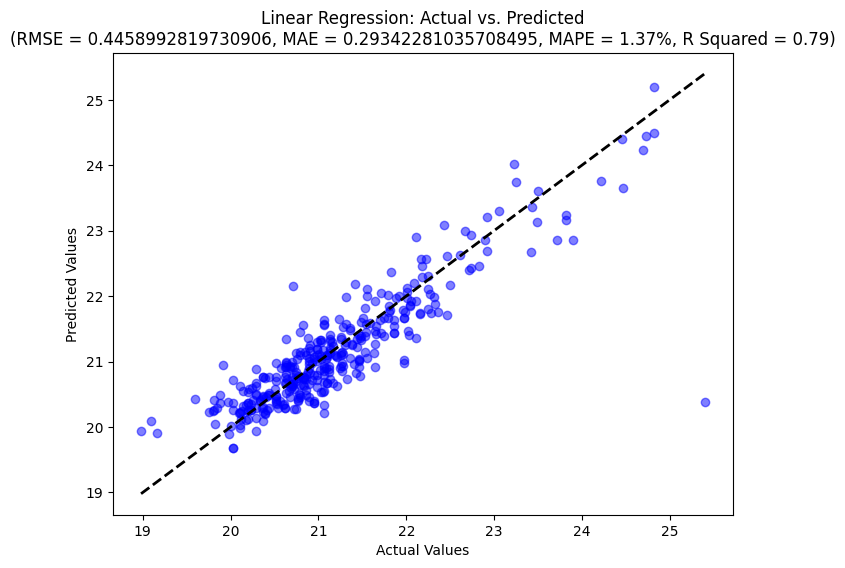

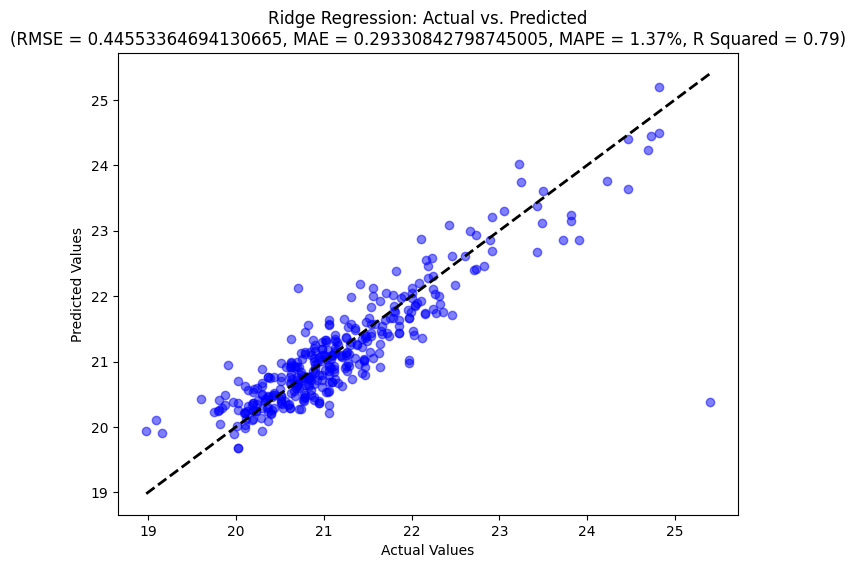

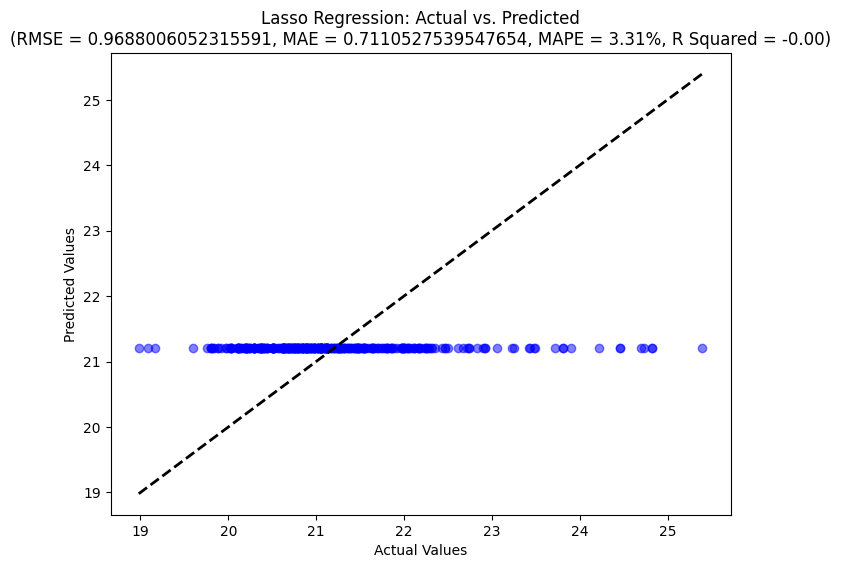

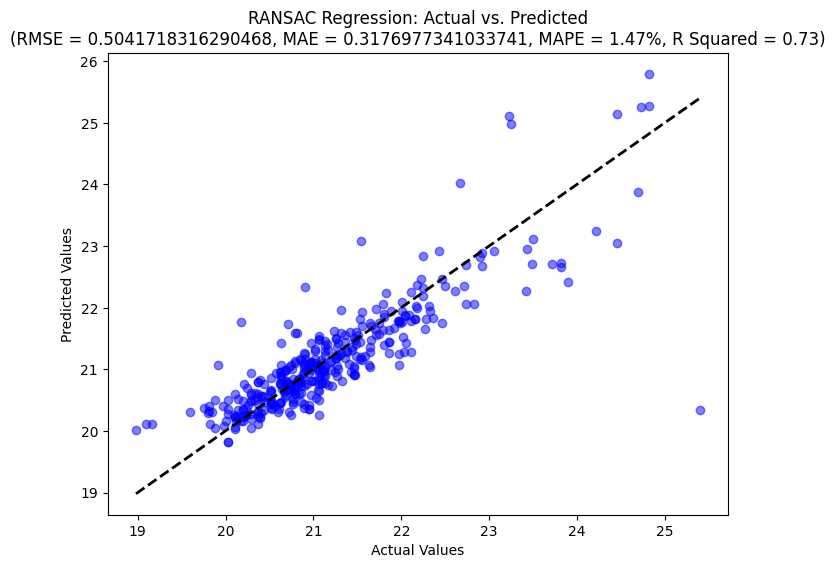

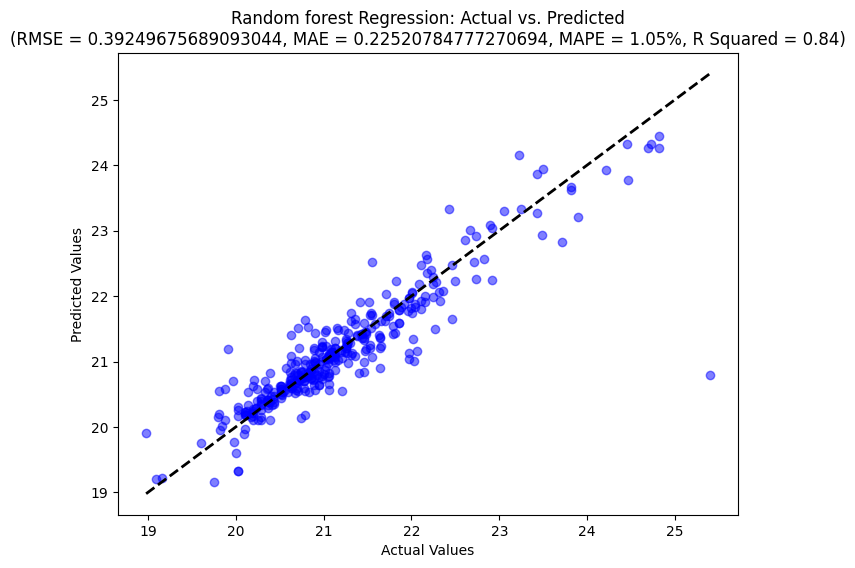

In [72]:

models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('RANSAC Regression', RANSACRegressor()),
    ('Random forest Regression', RandomForestRegressor())
]

results_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE', 'R Squared'])

for model_name, model in models:
    pipeline = Pipeline([
        ('Preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    
    # Menggunakan pd.concat untuk menggabungkan DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({
        'Model': [model_name],
        'RMSE': [rmse],
        'MAE': [mae],
        'MAPE': [mape],
        'R Squared': [r_squared]
    })], ignore_index=True)
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name}: Actual vs. Predicted\n(RMSE = {rmse}, MAE = {mae}, MAPE = {mape:.2%}, R Squared = {r_squared:.2f})")
    plt.show()

In [73]:
results_df

,Model,RMSE,MAE,MAPE,R Squared
0,Linear Regression,0.445899,0.293423,0.013716,0.787988
1,Ridge Regression,0.445534,0.293308,0.013710,0.788336
2,Lasso Regression,0.968801,0.711053,0.033057,-0.000819
3,RANSAC Regression,0.504172,0.317698,0.014736,0.728953
4,Random forest Regression,0.392497,0.225208,0.010462,0.835730


Dilihat dari hasil RMSE dan MAE dari setiap model, model Random Forest Regression adalah model yang terbaik untuk memprediksi harga rumah di daerah Jabodetabek berdasarkan fasilitas yang di miliki. tapi masih bisa di tuning lagi.

## Parameter Tuning

In [74]:
# Definisi parameter yang akan di-tune
param = {
    'model__n_estimators': [25, 50, 100, 200],
    'model__max_depth': [None, 3, 6, 9],
    'model__min_samples_split': [1, 2, 4, 8],
    'model__min_samples_leaf':[None, 3, 6, 9]
}


model = GridSearchCV(pipeline, 
                     param_grid=param, 
                     cv=3, 
                     n_jobs=-1, 
                     verbose=1
                    )

model.fit(X_train, y_train)


Fitting 3 folds for each of 256 candidates, totalling 768 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['K_tidur',
                                                                          'K_mandi',
                                                                          'luas_bangunan_m2',
                                                                          'luas_tanah_m2',
                                                                          'CCTV',
                                                                          'taman',
                                                                          'jalur_telepon',
                                                                          'AC',
                                                                          'kolam_renang']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encode',
                                                                                          OneHotEncoder())]),
                                                                         ['kota'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 3, 6, 9],
                         'model__min_samples_leaf': [None, 3, 6, 9],
                         'model__min_samples_split': [1, 2, 4, 8],
                         'model__n_estimators': [25, 50, 100, 200]},
             verbose=1)

In [75]:
pd.DataFrame(model.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
23,2.245645,0.034002,0.054899,0.004822,None,3,2,200,"{'model__max_depth': None, 'model__min_samples...",0.834012,0.833512,0.845504,0.837676,0.005539,1
31,1.611851,0.032867,0.033924,0.002493,None,3,8,200,"{'model__max_depth': None, 'model__min_samples...",0.834010,0.834172,0.844529,0.837570,0.004921,2
22,1.063603,0.030691,0.033221,0.002073,None,3,2,100,"{'model__max_depth': None, 'model__min_samples...",0.834190,0.832777,0.845532,0.837500,0.005709,3
29,0.499033,0.020745,0.021460,0.001888,None,3,8,50,"{'model__max_depth': None, 'model__min_samples...",0.834379,0.832430,0.844565,0.837124,0.005321,4
26,1.166602,0.089234,0.037475,0.004509,None,3,4,100,"{'model__max_depth': None, 'model__min_samples...",0.832826,0.831788,0.846667,0.837093,0.006783,5


In [76]:
model.best_params_

{'model__max_depth': None,
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 2,
 'model__n_estimators': 200}

In [77]:
pipeline = Pipeline([
    ('Preprocessor', preprocessor),
    ('model', RandomForestRegressor(max_depth=None,
                                    max_leaf_nodes=None,
                                    min_samples_split=4,
                                    n_estimators=100))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [78]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r_squared = r2_score(y_test, y_pred)

rmse, mae, mape, r_squared

(0.3936582196789119, 0.2284855803954645, 1.061442261743533, 0.8347560661647679)

Shape before preprocessing: (1440, 11)
Shape after preprocessing: (1440, 18)


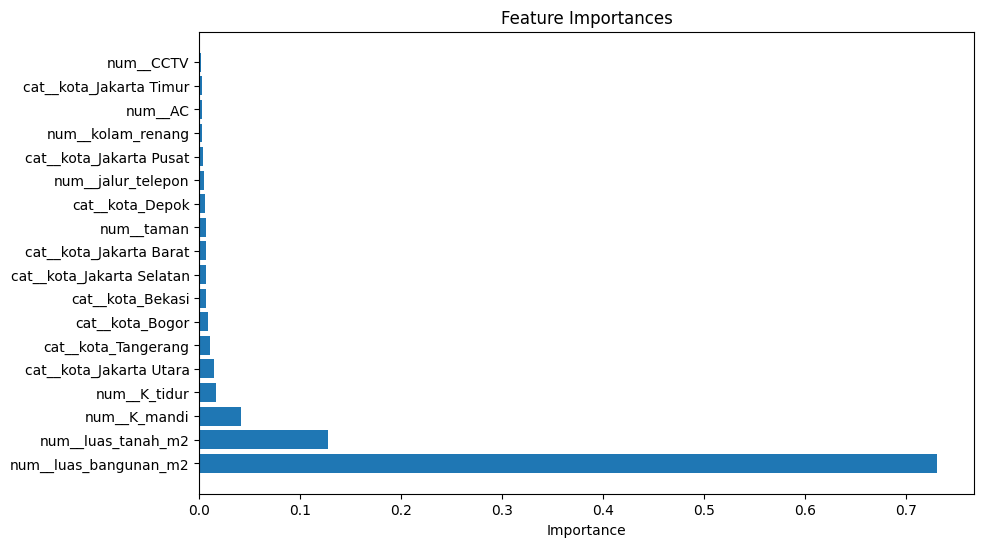

In [79]:
# Assuming 'pipeline' is your trained pipeline
# Assuming 'X_train' is your training data

# Get the preprocessor and the model from the pipeline
preprocessor = pipeline.named_steps['Preprocessor']
model = pipeline.named_steps['model']

# Check the shape of X_train before preprocessing
print("Shape before preprocessing:", X_train.shape)

# Apply preprocessing to training data
X_train_preprocessed = preprocessor.transform(X_train)

# Check the shape of X_train after preprocessing
print("Shape after preprocessing:", X_train_preprocessed.shape)

# Get the original feature names before preprocessing
original_feature_names = X_train.columns

# Get feature names after preprocessing
preprocessed_feature_names = preprocessor.get_feature_names_out(original_feature_names)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to organize feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': preprocessed_feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [80]:
# # Get feature importances from the trained model
# feature_importances = model.feature_importances_

# # Get the names of the features
# feature_names = X_train.columns  # Assuming X_train is your training data

# # Create a DataFrame to organize feature names and their importances
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# # Sort the DataFrame by importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Plot the feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
# plt.xlabel('Importance')
# plt.title('Feature Importances')
# plt.show()

karena random forest yang paling bagus, kita mencoba menggunakan random forest untuk mempredict harga rumah

In [81]:
data = raw_data.copy()

In [82]:
data

,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
0,Joglo,Jakarta Barat,2000000000,3.0,2.0,72,90,yes,no,yes,no,no
1,Cempaka Putih,Jakarta Pusat,1130000000,2.0,2.0,30,58,no,no,yes,no,no
2,Kelapa Gading,Jakarta Utara,1040000000,2.0,2.0,55,54,no,no,yes,no,no
3,Daan Mogot,Jakarta Barat,3950000000,4.0,2.0,120,135,no,no,yes,no,no
4,Jagakarsa,Jakarta Selatan,2500000000,5.0,6.0,83,200,yes,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
1996,Jatibening,Bekasi,810000000,2.0,1.0,120,90,no,no,no,no,no
1997,Jati Asih,Bekasi,1610000000,2.0,1.0,72,45,yes,no,no,no,no
1998,Jati Asih,Bekasi,1180000000,3.0,2.0,120,90,yes,no,no,no,no
1999,Harapan Indah,Bekasi,910000000,4.0,2.0,105,78,no,no,no,no,no


In [83]:
labelLok, labelKot = LabelEncoder(), LabelEncoder()
labelkateg = LabelEncoder()#untuk yes/no

data.lokasi = labelLok.fit_transform(data.lokasi)
data.kota = labelKot.fit_transform(data.kota)

data.taman = labelkateg.fit_transform(data.taman)
data.AC = labelkateg.transform(data.AC)
data.jalur_telepon = labelkateg.transform(data.jalur_telepon)
data.kolam_renang = labelkateg.transform(data.kolam_renang)
data.CCTV = labelkateg.transform(data.CCTV)

In [84]:
data.head()

,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
0,123,3,2000000000,3.0,2.0,72,90,1,0,1,0,0
1,43,4,1130000000,2.0,2.0,30,58,0,0,1,0,0
2,141,7,1040000000,2.0,2.0,55,54,0,0,1,0,0
3,84,3,3950000000,4.0,2.0,120,135,0,0,1,0,0
4,110,5,2500000000,5.0,6.0,83,200,1,0,0,0,0


In [85]:
X, y = data.iloc[:1801].drop('harga', axis=1), data.harga.iloc[:1801]#train dan tes
A, B = data.iloc[1801:].drop('harga', axis=1), data.harga.iloc[1801:]#untuk predict dr model
X.shape, y.shape

((1801, 11), (1801,))

Data split

In [86]:
XTRAIN, XTEST, YTRAIN, YTEST = train_test_split(X, y, test_size=0.20, shuffle=False)
XTRAIN.shape, XTEST.shape, YTRAIN.shape, YTEST.shape

((1440, 11), (361, 11), (1440,), (361,))

In [87]:
model = RandomForestRegressor(max_depth=None,
                                    max_leaf_nodes=None,
                                    min_samples_split=4,
                                    n_estimators=100)  # You can adjust the number of estimators

model.fit(XTRAIN, YTRAIN)


RandomForestRegressor(min_samples_split=4)

predik dengan data sebernarnya

In [88]:
apred = model.predict(A)
print(f'r2 = {r2_score(B, apred).round(2)}, \nmse = {mean_squared_error(B, apred)}\nmae = {mean_absolute_error(B, apred)}')

r2 = 0.64, 
mse = 4.473821247750272e+18
mae = 872129025.9920634


In [89]:
raw_data.head()

,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
0,Joglo,Jakarta Barat,2000000000,3.0,2.0,72,90,yes,no,yes,no,no
1,Cempaka Putih,Jakarta Pusat,1130000000,2.0,2.0,30,58,no,no,yes,no,no
2,Kelapa Gading,Jakarta Utara,1040000000,2.0,2.0,55,54,no,no,yes,no,no
3,Daan Mogot,Jakarta Barat,3950000000,4.0,2.0,120,135,no,no,yes,no,no
4,Jagakarsa,Jakarta Selatan,2500000000,5.0,6.0,83,200,yes,no,no,no,no


In [90]:
data.head()

,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
0,123,3,2000000000,3.0,2.0,72,90,1,0,1,0,0
1,43,4,1130000000,2.0,2.0,30,58,0,0,1,0,0
2,141,7,1040000000,2.0,2.0,55,54,0,0,1,0,0
3,84,3,3950000000,4.0,2.0,120,135,0,0,1,0,0
4,110,5,2500000000,5.0,6.0,83,200,1,0,0,0,0


In [91]:
random_head_sample = data.sample(min(5, len(data)))  # Adjust the value of 'n' as needed

print("Random Sample from the Head of Data:")
random_head_sample

Random Sample from the Head of Data:


,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
816,73,8,1930000000,2.0,2.0,179,90,1,0,0,0,0
1176,71,5,16000000000,5.0,3.0,526,400,0,0,1,0,0
942,32,0,870000000,2.0,2.0,60,47,1,0,0,0,0
1442,61,1,2470000000,3.0,1.0,128,160,1,0,0,0,0
914,170,0,616000000,2.0,1.0,72,72,0,0,1,0,0


In [92]:
model.predict([[44, # lokasi
                3,   #kota
                3.0, # kamar
                3.0, # kmr mndi
                119, # luas tanah
                120, # luas bangunan
                0,   # taman
                0,   # AC
                0,   # telpon
                0,   # kolam
                0]]) # CCTV

# predicted = model.predict(input)


array([2.32747381e+09])

predik dengan data yang sudah di pecah menurut kecamatan

In [93]:
df = pd.read_csv('D:\ANGELO\Documents\dataset_fixed.csv')
df

,Unnamed: 0,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
0,0,Babelan,Bekasi,470000000,2,1,72,48,no,no,no,no,no
1,1,Babelan,Bekasi,580000000,2,1,72,50,yes,no,no,no,no
2,2,Babelan,Bekasi,490000000,2,1,60,55,yes,no,no,no,no
3,3,Babelan,Bekasi,700000000,2,1,107,55,yes,no,no,no,no
4,4,Babelan,Bekasi,650000000,2,1,101,57,yes,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1996,Tangerang,Tangerang,2460000000,3,3,108,75,no,no,yes,no,no
1997,1997,Tangerang,Tangerang,2780000000,4,4,105,110,no,no,yes,no,no
1998,1998,Tangerang,Tangerang,375000000,2,1,123,36,no,no,yes,no,no
1999,1999,Tangerang,Tangerang,750000000,2,1,90,60,no,no,no,no,no


In [94]:
data2 = df.copy()
data2

,Unnamed: 0,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
0,0,Babelan,Bekasi,470000000,2,1,72,48,no,no,no,no,no
1,1,Babelan,Bekasi,580000000,2,1,72,50,yes,no,no,no,no
2,2,Babelan,Bekasi,490000000,2,1,60,55,yes,no,no,no,no
3,3,Babelan,Bekasi,700000000,2,1,107,55,yes,no,no,no,no
4,4,Babelan,Bekasi,650000000,2,1,101,57,yes,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1996,Tangerang,Tangerang,2460000000,3,3,108,75,no,no,yes,no,no
1997,1997,Tangerang,Tangerang,2780000000,4,4,105,110,no,no,yes,no,no
1998,1998,Tangerang,Tangerang,375000000,2,1,123,36,no,no,yes,no,no
1999,1999,Tangerang,Tangerang,750000000,2,1,90,60,no,no,no,no,no


In [95]:
labelLok, labelKot = LabelEncoder(), LabelEncoder()
labelkateg = LabelEncoder()#untuk yes/no

data2.lokasi = labelLok.fit_transform(data2.lokasi)
data2.kota = labelKot.fit_transform(data2.kota)

data2.taman = labelkateg.fit_transform(data2.taman)
data2.AC = labelkateg.transform(data2.AC)
data2.jalur_telepon = labelkateg.transform(data2.jalur_telepon)
data2.kolam_renang = labelkateg.transform(data2.kolam_renang)
data2.CCTV = labelkateg.transform(data2.CCTV)

In [96]:
data2

,Unnamed: 0,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
0,0,1,0,470000000,2,1,72,48,0,0,0,0,0
1,1,1,0,580000000,2,1,72,50,1,0,0,0,0
2,2,1,0,490000000,2,1,60,55,1,0,0,0,0
3,3,1,0,700000000,2,1,107,55,1,0,0,0,0
4,4,1,0,650000000,2,1,101,57,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1996,110,8,2460000000,3,3,108,75,0,0,1,0,0
1997,1997,110,8,2780000000,4,4,105,110,0,0,1,0,0
1998,1998,110,8,375000000,2,1,123,36,0,0,1,0,0
1999,1999,110,8,750000000,2,1,90,60,0,0,0,0,0


In [97]:
X, y = data.iloc[:1801].drop('harga', axis=1), data.harga.iloc[:1801]#train dan tes
A, B = data.iloc[1801:].drop('harga', axis=1), data.harga.iloc[1801:]#untuk predict dr model
X.shape, y.shape

((1801, 11), (1801,))

In [98]:
XTRAIN, XTEST, YTRAIN, YTEST = train_test_split(X, y, test_size=0.20, shuffle=False)
XTRAIN.shape, XTEST.shape, YTRAIN.shape, YTEST.shape

((1440, 11), (361, 11), (1440,), (361,))

In [99]:
model2 = RandomForestRegressor(max_depth=None,
                                    max_leaf_nodes=None,
                                    min_samples_split=4,
                                    n_estimators=100)  # You can adjust the number of estimators

model2.fit(XTRAIN, YTRAIN)


RandomForestRegressor(min_samples_split=4)

In [100]:
apred = model2.predict(A)
print(f'r2 = {r2_score(B, apred).round(2)}, \nmse = {mean_squared_error(B, apred)}\nmae = {mean_absolute_error(B, apred)}')

r2 = 0.53, 
mse = 5.845948802443373e+18
mae = 926589693.3902208


In [101]:
model2.predict([[44, # lokasi
                3,   #kota
                3.0, # kamar
                3.0, # kmr mndi
                119, # luas tanah
                120, # luas bangunan
                0,   # taman
                0,   # AC
                0,   # telpon
                0,   # kolam
                0]]) # CCTV

# predicted = model.predict(input)


array([2.28432679e+09])

In [102]:
# import joblib

# encoder = pipeline.named_steps['Preprocessor'].named_transformers_['cat'].named_steps['encode']
# joblib.dump(encoder, 'encoder.joblib')

In [103]:
# model_filename = 'D:\.vscode\kodingan\model_finalProject\\final_projectmodel.joblib'
# joblib.dump(pipeline, model_filename)